0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
Finished Training. 
 MSE: 9.982487587474633
Expected 6.  Guess 8
Test Accuracy: 0.0
Test MSE = 10.54761804837009
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
Finished Training. 
 MSE: 9.025707981638337
Expected 4.  Guess 7
Test Accuracy: 0.0
Test MSE = 10.100117693400614
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
Finished Training. 
 MSE: 9.086863358794915
Expected 3.  Guess 8
Test Accuracy: 0.0
Test MSE = 12.515478868280766
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
Finished Training. 
 MSE: 9.32900478043423
Expected 4.  Guess 0
Test Accuracy: 0.0
Test MSE = 11.070088628600185
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
Finished Training. 
 MSE: 9.013068206491418
Expected 0.  Guess 8
Test Accuracy: 0.0
Test MSE = 13.243582815378923
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


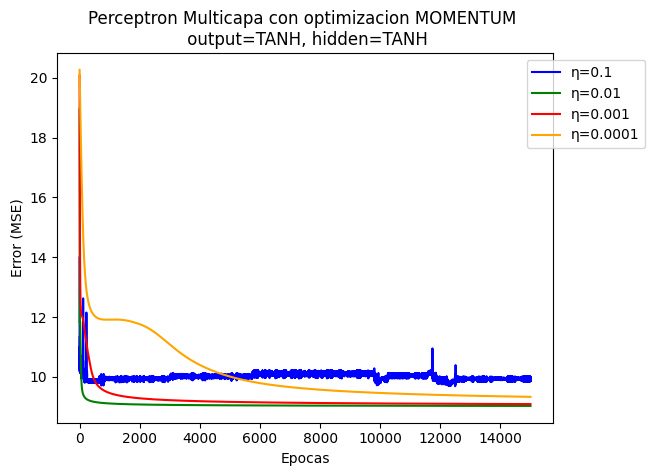

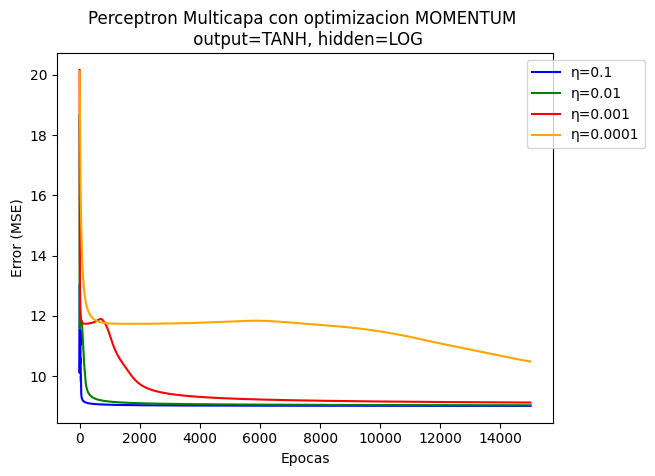

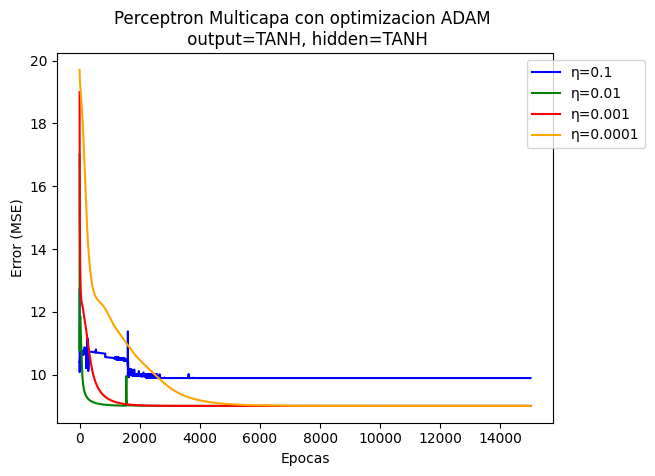

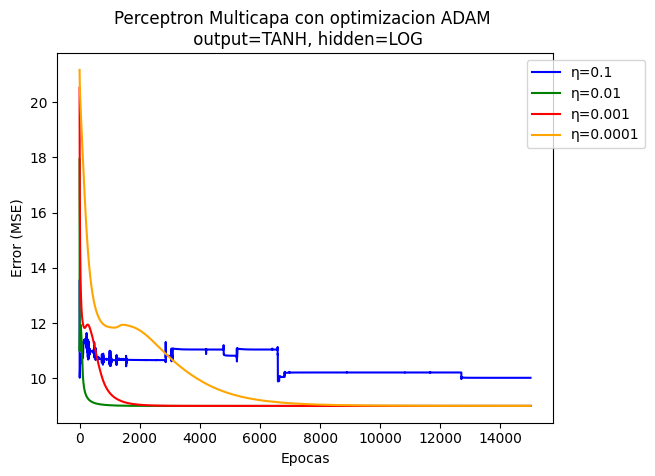

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import parse_nums
from src.perceptron import MultilayerPerceptron

PATH = "./data/Ej3B-digitos.txt"

OUTPUT_ACTIVATION = ["TANH"]
HIDDEN_ACTIVATION = ["TANH", "LOG"]
BETA = 1

TRAINING_TYPE = "PERCENTAGE"
K_FOLD = 4
LR = 0.1
BIAS = 1
EPOCHS = 15000
MIN_ERROR = 0.01
TRAINING_PERCENTAGE = 0.9

QTY_HIDDEN_LAYERS = 2
QTY_NODES_IN_HIDDEN_LAYERS = [25, 15]

OPTIMIZER_METHOD = ["MOMENTUM", "ADAM"]
K_FOLD = 4
ALPHA = 0.8
BETA1 = 0.9
BETA2 = 0.999
EPSILON = 1e-8

input_data, expected_data = parse_nums(PATH, 7, 3)

#-------------------------------------------------
# VARIANDO EL LEARNING RATE
#-------------------------------------------------

arr_of_errors = []
arr_of_epochs = []
lrs = [round(LR*(10**(-i)),4) for i in range(4)]

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    arr_of_error_aux = []
    arr_of_epochs_aux = []
    for out_act in OUTPUT_ACTIVATION:
        arr_of_error_aux2 = []
        arr_of_epochs_aux2 = []
        for hidden_act in HIDDEN_ACTIVATION:
            arr_of_error_aux3 = []
            arr_of_epochs_aux3 = []
            for lr in lrs:
                perceptron = MultilayerPerceptron(input_data, expected_data, lr, BIAS,
                                                EPOCHS, TRAINING_TYPE, TRAINING_PERCENTAGE, K_FOLD, MIN_ERROR,
                                                QTY_HIDDEN_LAYERS, QTY_NODES_IN_HIDDEN_LAYERS, 
                                                out_act, hidden_act, BETA,
                                                opt_method, ALPHA, BETA1, BETA2, EPSILON, [-1,1])
                mse_errors, total_epochs, acurracy, test_mse = perceptron.train()
                arr_of_error_aux3.append(mse_errors)
                arr_of_epochs_aux3.append(total_epochs)

            arr_of_error_aux2.append(arr_of_error_aux3)
            arr_of_epochs_aux2.append(arr_of_epochs_aux3)

        arr_of_error_aux.append(arr_of_error_aux2)
        arr_of_epochs_aux.append(arr_of_epochs_aux2)

    arr_of_errors.append(arr_of_error_aux)
    arr_of_epochs.append(arr_of_epochs_aux)
    
colors = ['blue', 'green', 'red', 'orange']

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    for j, out_act in enumerate(OUTPUT_ACTIVATION):
        for k, hidden_act in enumerate(HIDDEN_ACTIVATION):
            for s in range(len(arr_of_errors[i][j][k])):
                plt.plot(range(arr_of_epochs[i][j][k][s]), arr_of_errors[i][j][k][s], color=colors[s], label=f"η={lrs[s]}")
            plt.title(f'Perceptron Multicapa con optimizacion {opt_method} \n output={out_act}, hidden={hidden_act}')
            plt.xlabel("Epocas")
            plt.ylabel("Error (MSE)")
            plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
            plt.show()
       

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import parse_nums
from src.perceptron import MultilayerPerceptron

#-------------------------------------------------
# VARIANDO EL PORCENTAJE DE ENTRENAMIENTO
#-------------------------------------------------

PATH = "./data/Ej3B-digitos.txt"
OUTPUT_ACTIVATION = "TANH"
HIDDEN_ACTIVATION = "TANH"
BETA = 1.0

TRAINING_TYPE = "PERCENTAGE"
LR = 0.001
BIAS = 1
EPOCHS = 50000
MIN_ERROR = 0.01

QTY_HIDDEN_LAYERS = 2
QTY_NODES_IN_HIDDEN_LAYERS = [25, 15]

OPTIMIZER_METHOD = ["MOMENTUM", "ADAM"]
K_FOLD = 4
ALPHA = 0.8
BETA1 = 0.9
BETA2 = 0.999
EPSILON = 1e-8
TRAIN_PERCENTAGES = [round(0.1*i,2) for i in range(4,11)]
ITERATIONS = 50

input_data, expected_data = parse_nums(PATH, 7, 3)

arr_avg_train_mses = []
arr_std_train_mses = []
arr_avg_test_mses = []
arr_std_test_mses = []

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    avg_train_mses = []
    std_train_mses = []
    avg_test_mses = []
    std_test_mses = []
    for p in TRAIN_PERCENTAGES:
        train = []
        test = []
        for iter in range(ITERATIONS):
            perceptron = MultilayerPerceptron(input_data, expected_data, LR, BIAS,
                                                EPOCHS, TRAINING_TYPE, p, K_FOLD, MIN_ERROR,
                                                QTY_HIDDEN_LAYERS, QTY_NODES_IN_HIDDEN_LAYERS, 
                                                OUTPUT_ACTIVATION, HIDDEN_ACTIVATION, BETA,
                                                opt_method, ALPHA, BETA1, BETA2, EPSILON,  [-1,1])
            mse_errors, total_epochs, test_acurracy, test_mse = perceptron.train()
            #Testeo con el que entrene
            print(f"-------------- Entrenamiento con p={p}----------------")
            if(p == 1):
                train_acurracy, train_mse = perceptron.test(perceptron.input_data, perceptron.expected_data)
            else:
                train_acurracy, train_mse = perceptron.test(perceptron.train_input_data, perceptron.train_expected_data)
            print("------------------------------")
            train.append(train_acurracy)
            test.append(test_acurracy)
            
        train_aux = sum(train) / len(train)
        avg_train_mses.append(train_aux)
        error_train = np.std(train) / np.sqrt((len(train)))
        std_train_mses.append(error_train)
        
        test_aux = sum(test) / len(test)
        avg_test_mses.append(test_aux)
        error_test = np.std(test) / np.sqrt((len(test)))
        std_test_mses.append(error_test)
                    
    arr_avg_train_mses.append(avg_train_mses)
    arr_std_train_mses.append(std_train_mses)
    arr_avg_test_mses.append(avg_test_mses)
    arr_std_test_mses.append(std_test_mses)
    
for i, opt_method in enumerate(OPTIMIZER_METHOD):
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_train_mses[i], yerr=arr_std_train_mses[i], color="blue", capsize=4, label="Train")
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_test_mses[i], yerr=arr_std_test_mses[i], color="red", capsize=4, label="Test")
    plt.title(f'Perceptron Multicapa con optimizacion {opt_method} \n output={OUTPUT_ACTIVATION}, hidden={HIDDEN_ACTIVATION}')
    plt.xlabel("Porcentaje de entrenamiento")
    plt.ylabel("Acurracy")
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
Finished Training. 
 MSE: 9.050343020295035
Expected 6.  Guess 8
Expected 0.  Guess 8
Expected 7.  Guess 2
Expected 3.  Guess 8
Expected 9.  Guess 8
Expected 1.  Guess 2
Test Accuracy: 0.0
Test MSE = 12.707470211777
-------------- Entrenamiento con p=0.4----------------
Expected 2.  Guess 2
Expected 8.  Guess 8
Expected 5.  Guess 5
Expected 4.  Guess 4
Test Accuracy: 1.0
Test MSE = 9.050342680652179
------------------------------
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
4800